# Create Data

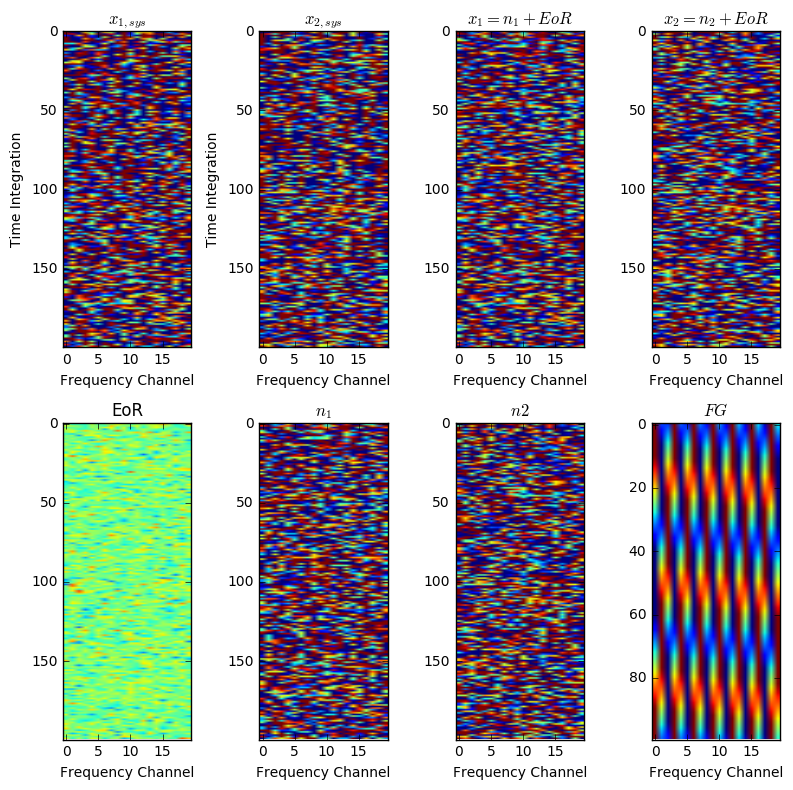

In [2]:
import capo
import numpy as n
import matplotlib.pyplot as plt
n.random.seed(100) # for reproducibility

times = 100
freqs = 20

# Create fake simple foreground
FG = []
for t in range(times):
    sine = n.exp(2j*n.pi*(n.linspace(0,2*n.pi,freqs)+t/100.))*5
    FG.append(sine)
FG = n.array(FG).T

# Create fake EoR
EoR = capo.oqe.noise((freqs, 2*times))
EoR2 = capo.oqe.noise((freqs, 2*times))

# Create fake noise
n1 = capo.oqe.noise((freqs, 2*times))*10
n2 = capo.oqe.noise((freqs, 2*times))*10

# Create datasets
x1_sys = n.hstack(((n1 + EoR)[:,:times]+FG,(n1+EoR)[:,times:])) # FG is only in the first half
x2_sys = n.hstack(((n2 + EoR)[:,:times]+FG,(n2+EoR)[:,times:])) # FG is only in the first half
x1 = n1 + EoR
x2 = n2 + EoR2

# Plot datasets
plt.figure(figsize=(8,8))
plt.subplot(241)
plt.imshow(x1_sys.real.T, aspect='auto', vmax=4, vmin=-4)
plt.ylabel('Time Integration')
plt.xlabel('Frequency Channel')
plt.title("$x_{1,sys}$")
plt.subplot(242)
plt.imshow(x2_sys.real.T, aspect='auto', vmax=4, vmin=-4)
plt.ylabel('Time Integration')
plt.xlabel('Frequency Channel')
plt.title("$x_{2,sys}$")
plt.subplot(243)
plt.imshow(x1.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("$x_{1} = n_{1} + EoR$")
plt.subplot(244)
plt.imshow(x2.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("$x_{2} = n_{2} + EoR$")
plt.subplot(245)
plt.imshow(EoR.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("EoR")
plt.subplot(246)
plt.imshow(n1.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("$n_{1}$")
plt.subplot(247)
plt.imshow(n2.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("$n2$")
plt.subplot(248)
plt.imshow(FG.real.T, aspect='auto', vmax=4, vmin=-4)
plt.xlabel('Frequency Channel')
plt.title("$FG$")
#plt.colorbar()
plt.tight_layout()
plt.show()

# Make Power Spectra

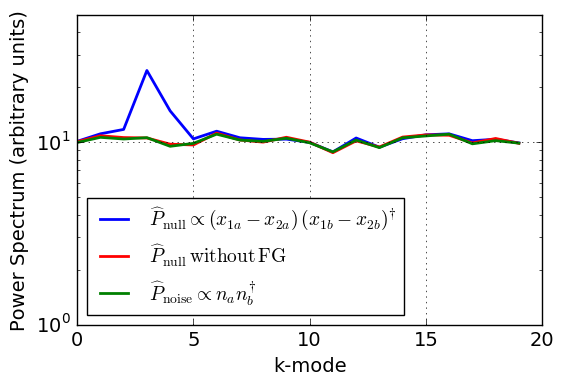

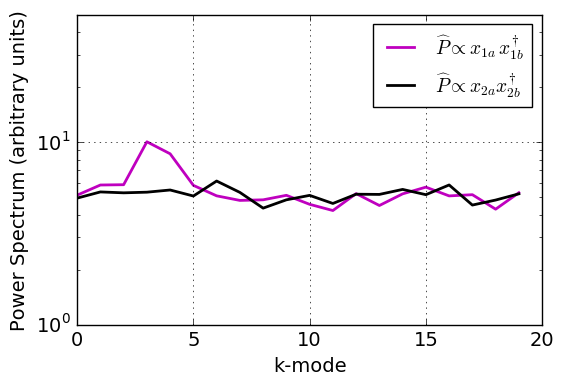

In [3]:
# PS Function
def get_PS(DATA1, DATA2, use_cov=False):
    ds_DATA = capo.oqe.DataSet()
    ds_DATA.set_data(dsets = {'DATA1': DATA1.T,'DATA2': DATA2.T})
    q_DATA = ds_DATA.q_hat('DATA1','DATA2', use_cov=use_cov, cov_flagging=False)
    F_DATA = ds_DATA.get_F('DATA1','DATA2', use_cov=use_cov, cov_flagging=False)
    M_DATA,W_DATA = ds_DATA.get_MW(F_DATA, mode='I')
    p_DATA = ds_DATA.p_hat(M_DATA,q_DATA)  
    return p_DATA

# Get PS
p_null_with_sys = get_PS(x1_sys[:,:times]-x1_sys[:,times:],x2_sys[:,:times]-x2_sys[:,times:]) # first half minus last half
p_null_without_sys = get_PS(x1[:,:times]-x1[:,times:],x2[:,:times]-x2[:,times:])
pn = get_PS(n1[:,:times]-n1[:,times:],n2[:,:times]-n2[:,times:])
p_firsthalf = get_PS(x1_sys[:,:times],x2[:,:times])
p_lasthalf = get_PS(x1_sys[:,times:],x2[:,times:])
pn_firsthalf = get_PS(n1[:,:times],n2[:,times:])
pn_lasthalf = get_PS(n2[:,:times],n2[:,times:])

# Plot
plt.semilogy(n.sqrt(n.mean(n.abs(p_null_with_sys)**2, axis=1)), 'b-', label='$\widehat{P}_{\mathrm{null}} \propto (x_{1a}-x_{2a})\,(x_{1b}-x_{2b})^{\dagger}$', linewidth=2)
plt.semilogy(n.sqrt(n.mean(n.abs(p_null_without_sys)**2, axis=1)), 'r-', label=r'$\widehat{P}_{\mathrm{null}}\, \rm without\, FG$', linewidth=2)
plt.semilogy(n.sqrt(n.mean(n.abs(pn)**2, axis=1)), 'g-', label='$\widehat{P}_{\mathrm{noise}} \propto n_{a}n_{b}^{\dagger}$', linewidth=2)
plt.ylabel('Power Spectrum (arbitrary units)', fontsize=14)
plt.xlabel('k-mode', fontsize=14)
plt.legend(prop={'size':14},loc='best')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(1e0,5e1)
plt.grid()
plt.savefig('/home/cacheng/capo/ctc/methods_paper_images/toy_bias1.pdf',bbox_inches='tight')
plt.show()

plt.semilogy(n.sqrt(n.mean(n.abs(p_firsthalf)**2, axis=1)), 'm-', label='$\widehat{P} \propto x_{1a}\,x_{1b}^{\dagger}$', linewidth=2)
plt.semilogy(n.sqrt(n.mean(n.abs(p_lasthalf)**2, axis=1)), 'k-', label='$\widehat{P} \propto x_{2a}x_{2b}^{\dagger}$', linewidth=2)
#plt.semilogy(n.sqrt(n.mean(n.abs(pn_firsthalf)**2, axis=1)), 'g-', label='$\hat{p}_{noise,first half}$')
#plt.semilogy(n.sqrt(n.mean(n.abs(pn_lasthalf)**2, axis=1)), 'g--', label='$\hat{p}_{noise,last half}$')
plt.ylabel('Power Spectrum (arbitrary units)', fontsize=14)
plt.xlabel('k-mode', fontsize=14)
plt.legend(prop={'size':14},loc='best')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(1e0,5e1)
plt.grid()
plt.savefig('/home/cacheng/capo/ctc/methods_paper_images/toy_bias2.pdf',bbox_inches='tight')
plt.show()

# Null and Jackknife Tests

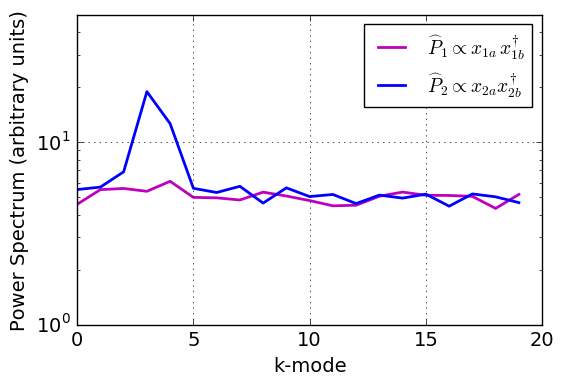

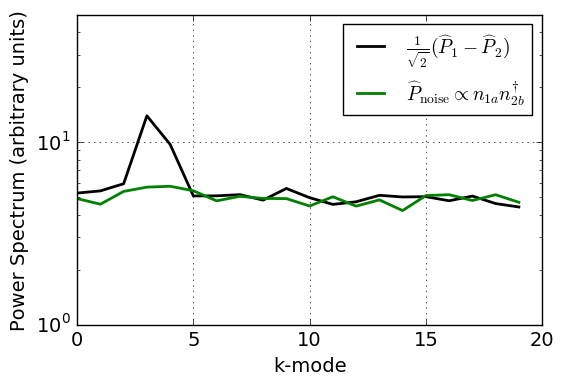

In [4]:
import capo
import numpy as n
import matplotlib.pyplot as plt
n.random.seed(100) # for reproducibility

times = 100
freqs = 20

# Create fake simple foreground
FG = []
for t in range(times):
    sine = n.exp(2j*n.pi*(n.linspace(0,2*n.pi,freqs)+t/100.))*5
    FG.append(sine)
FG = n.array(FG).T

# Create fake EoR
EoR = capo.oqe.noise((freqs, times))

# Create fake noise for two datasets and two baselines
n1 = capo.oqe.noise((freqs, times))*10
n2 = capo.oqe.noise((freqs, times))*10
n3 = capo.oqe.noise((freqs,times))*10
n4 = capo.oqe.noise((freqs,times))*10

# Create datasets
x1_bl1 = n1 + EoR # first dataset is "even" JD's, for example
x1_bl2 = n2 + EoR
x2_bl1 = n3 + EoR + FG # second dataset has FG - "odd" JD's, for example
x2_bl2 = n4 + EoR + FG

#-----------------

# PS Function
def get_PS(DATA1, DATA2, use_cov=False):
    ds_DATA = capo.oqe.DataSet()
    ds_DATA.set_data(dsets = {'DATA1': DATA1.T,'DATA2': DATA2.T})
    q_DATA = ds_DATA.q_hat('DATA1','DATA2', use_cov=use_cov, cov_flagging=False)
    F_DATA = ds_DATA.get_F('DATA1','DATA2', use_cov=use_cov, cov_flagging=False)
    M_DATA,W_DATA = ds_DATA.get_MW(F_DATA, mode='I')
    p_DATA = ds_DATA.p_hat(M_DATA,q_DATA)  
    return p_DATA

# Get PS
p1 = get_PS(x1_bl1,x1_bl2)
p2 = get_PS(x2_bl1,x2_bl2)
p_null = get_PS(x1_bl1-x2_bl1,x1_bl2-x2_bl2)
pn = get_PS(n1,n4)

# Plot
plt.semilogy(n.sqrt(n.mean(n.abs(p1)**2, axis=1)), 'm-', label='$\widehat{P}_{1} \propto x_{1a}\,x_{1b}^{\dagger}$', linewidth=2)
plt.semilogy(n.sqrt(n.mean(n.abs(p2)**2, axis=1)), 'b-', label='$\widehat{P}_{2} \propto x_{2a}x_{2b}^{\dagger}$', linewidth=2)
plt.ylabel('Power Spectrum (arbitrary units)', fontsize=14)
plt.xlabel('k-mode', fontsize=14)
plt.legend(prop={'size':14},loc='best')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(1e0,5e1)
plt.grid()
plt.savefig('/home/cacheng/capo/ctc/methods_paper_images/toy_bias2.pdf',bbox_inches='tight')
plt.show()

plt.semilogy(n.sqrt(n.mean(n.abs(p1-p2)**2, axis=1)) / n.sqrt(2), 'k-', label=r'$\frac{1}{\sqrt{2}}(\widehat{P}_{1}-\widehat{P}_{2})$', linewidth=2)
#plt.semilogy(n.sqrt(n.mean(n.abs(p_null)**2, axis=1)), 'k-', label='$\widehat{P}_{\mathrm{null}} \propto (x_{1a}-x_{2a})\,(x_{1b}-x_{2b})^{\dagger}$', linewidth=2)
plt.semilogy(n.sqrt(n.mean(n.abs(pn)**2, axis=1)), 'g-', label='$\widehat{P}_{\mathrm{noise}} \propto n_{1a}n_{2b}^{\dagger}$', linewidth=2)
plt.ylabel('Power Spectrum (arbitrary units)', fontsize=14)
plt.xlabel('k-mode', fontsize=14)
plt.legend(prop={'size':14},loc='best')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(1e0,5e1)
plt.grid()
plt.savefig('/home/cacheng/capo/ctc/methods_paper_images/toy_bias1.pdf',bbox_inches='tight')
plt.show()